# 선형회귀분석 기초



In [1]:
%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

#그래프 한글폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#스탯츠모델 임포트
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

---

# 바이어스 오그멘테이션

In [6]:
# 바이어스 오그멘테이션을 하는 코드예제------------------------------------------
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2,
                              bias=100, noise=10, coef=True, random_state=1)

In [7]:
# 원래 데이터
X0[:5]


array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [8]:
# 바이어스 오그멘테이션
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [9]:
import statsmodels.api as sm

X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

# OLS (Ordinary Least Squares)

# Numpy로 선형회귀분석

- 약간 노가다임. 아래보면 더 편한 방법이 있음

In [ ]:
from sklearn.datasets import make_regression

bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0) #바이어스 오그멘테이션!
y = y.reshape(len(y), 1) #벡터형태로

In [13]:
coef

array(80.71051956187792)

In [15]:
# OLS 해를 직접 이용하는 방법
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w
#결과값 해석 : 값은 정확하지 않지만 비슷하게 나왔다.

array([[ 102.02701439],
       [  81.59750943]])

In [16]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y)[0]
w

array([[ 102.02701439],
       [  81.59750943]])

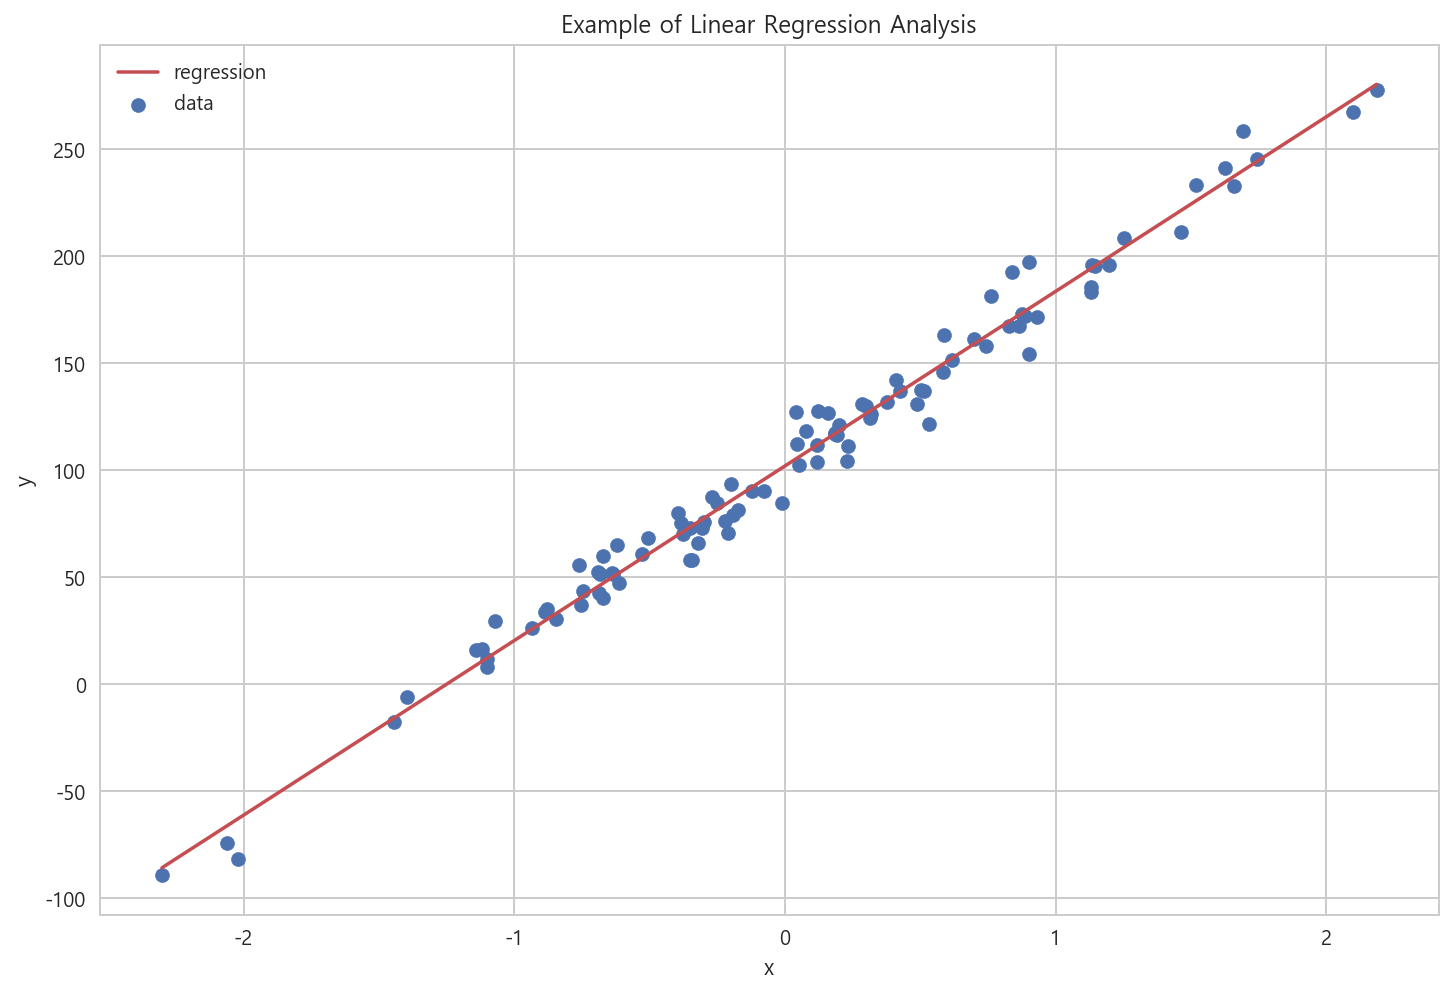

점은 실제데이터, 빨간선은 예측값의 위치다


In [22]:
x_new = np.linspace(np.min(X0), np.max(X0), 100) #가짜데이터 생성
X_new = sm.add_constant(x_new)  # 오그멘테이션
y_new = np.dot(X_new, w)

plt.figure(figsize=(12,8))
plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()
print("점은 실제데이터, 빨간선은 예측값의 위치다")

---
- 위의 노가다는 이제 그만
# Scikit-Learn 패키지로 선형회귀분석


https://datascienceschool.net/view-notebook/58269d7f52bd49879965cdc4721da42d/ (페이지 중간부터)

In [28]:
#보스턴 집값 데이터 이용 (좀 복잡한거로!)

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

In [30]:
model_boston.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [31]:
model_boston.intercept_

36.491103280363134

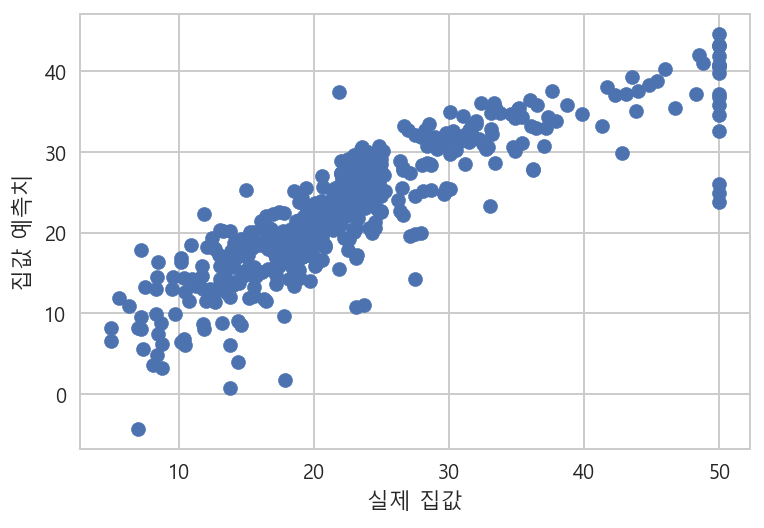

In [33]:
#집값 예측치
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

In [38]:
# 연습문제

In [39]:
from sklearn.datasets import make_regression

bias = 100
X, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=1)


In [40]:
model = LinearRegression().fit(X, y)

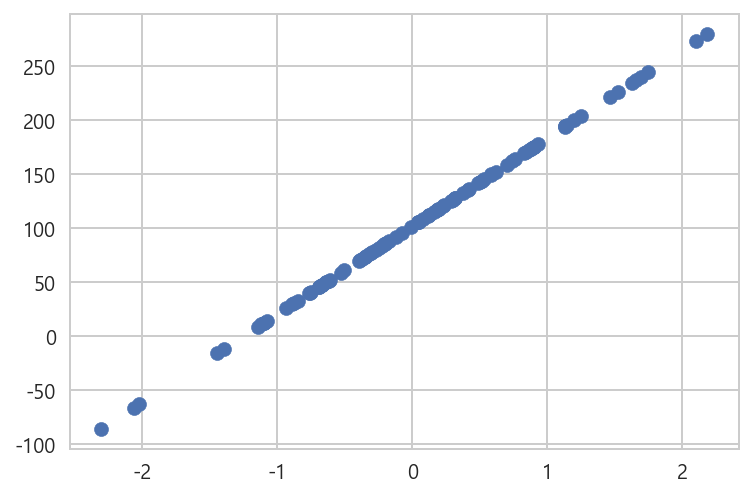

In [42]:
# y_new = model.predict(x_new)

predictions = model.predict(X)

plt.scatter(X, predictions)
plt.show()

# StatsModels로 선형회귀분석
### !! 제대로 해석하려면 이거써라

In [43]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 23 Jun 2018   Prob (F-statistic):          6.95e-135
Time:                        12:51:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

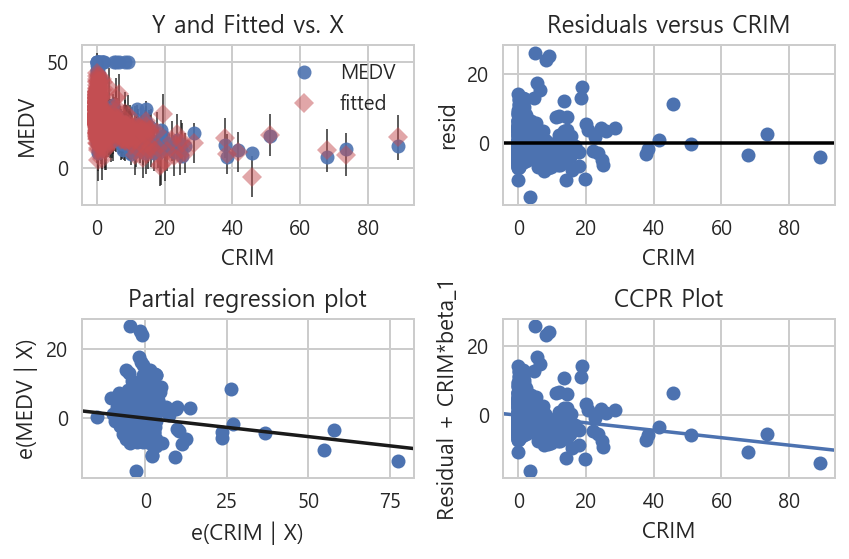

In [45]:
fig = sm.graphics.plot_regress_exog(result_boston2, "CRIM")
fig.suptitle("")
plt.show()

#resid = 잔차의 분포 == 밀집위치가 일정해야한다.

# 레버리지계산

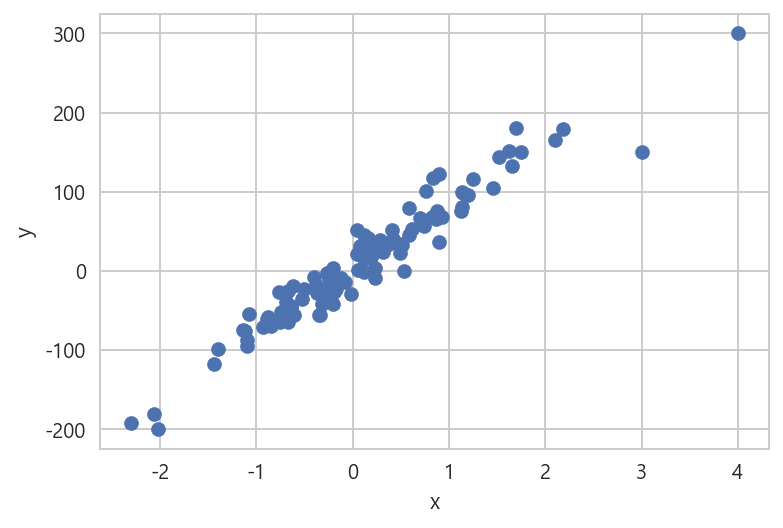

In [46]:
from sklearn.datasets import make_regression

# 100개의 데이터 생성
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, 
                              coef=True, random_state=1)

# 레버리지가 높은 가상의 데이터를 추가
data_100 = (4, 300)
data_101 = (3, 150)
X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])
X = sm.add_constant(X0)
y = np.hstack([y, [data_100[1], data_101[1]]])

plt.scatter(X0, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [47]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           1.61e-61
Time:                        21:26:02   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

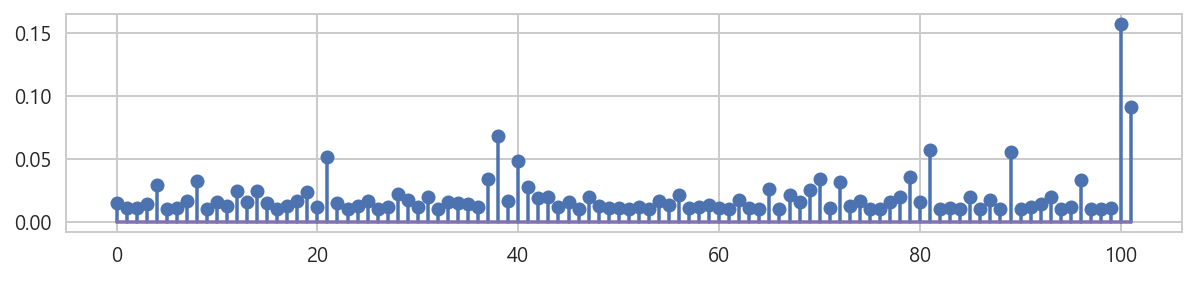

In [48]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

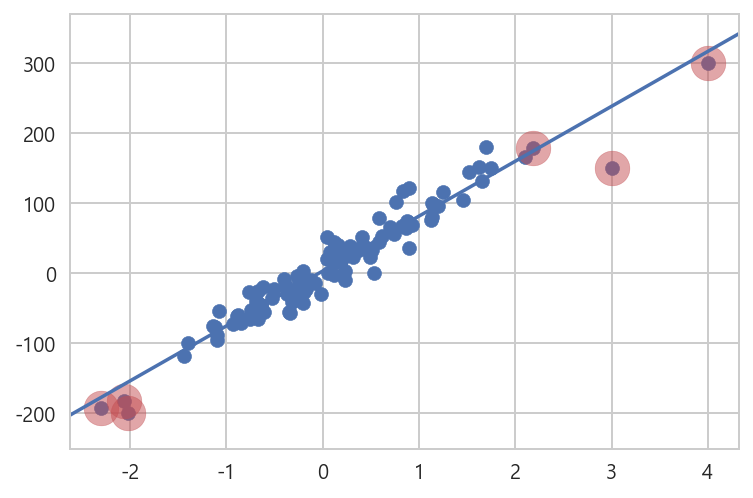

In [49]:
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.show()

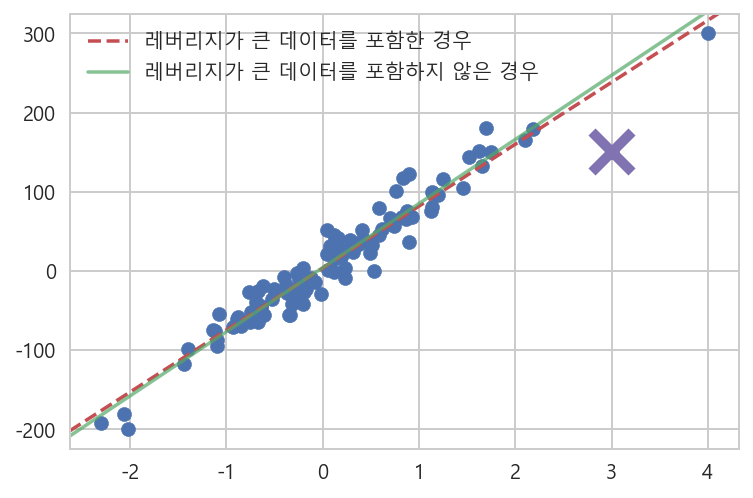

In [50]:
model2 = sm.OLS(y[:-1], X[:-1])
result2 = model2.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result,
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result2,
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[-1], y[-1], marker='x', c="m", ms=20, mew=5)
plt.legend([u"레버리지가 큰 데이터를 포함한 경우", u"레버리지가 큰 데이터를 포함하지 않은 경우"],
           loc="upper left")
plt.show()

#회귀분석결과에 영향을 주는 하나의 데이터 = 레버리지가 큰 데이터

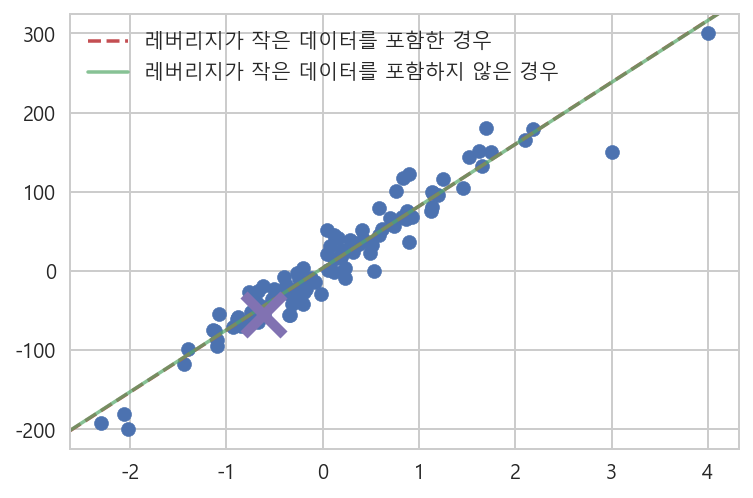

In [51]:
model3 = sm.OLS(y[1:], X[1:])
result3 = model3.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, 
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result3, 
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[0], y[0], marker='x', c="m", ms=20, mew=5)
plt.legend([u"레버리지가 작은 데이터를 포함한 경우", u"레버리지가 작은 데이터를 포함하지 않은 경우"], 
           loc="upper left")
plt.show()

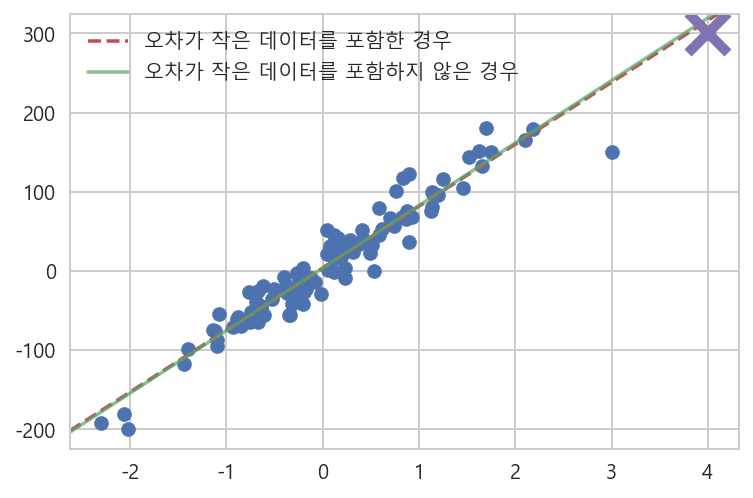

In [52]:
idx = np.array(list(range(100)) + [101])
model4 = sm.OLS(y[idx], X[idx, :])
result4 = model4.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, 
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result4, 
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[-2], y[-2], marker='x', c="m", ms=20, mew=5)
plt.legend([u"오차가 작은 데이터를 포함한 경우", u"오차가 작은 데이터를 포함하지 않은 경우"], 
           loc="upper left")
plt.show()

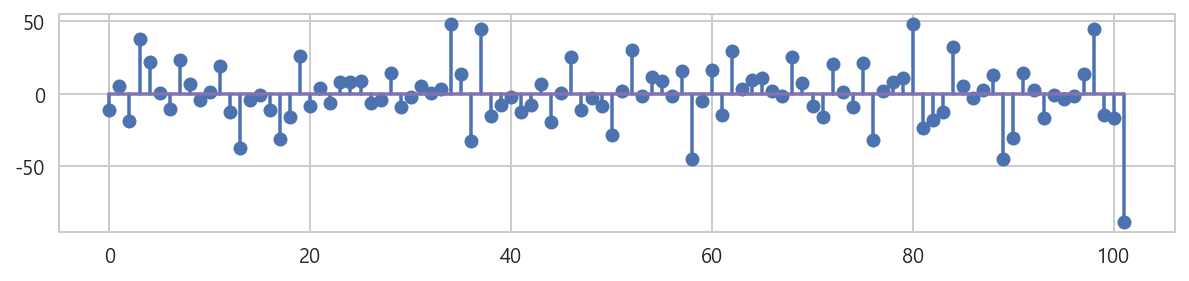

In [53]:
# 표준화잔차계산
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.show()

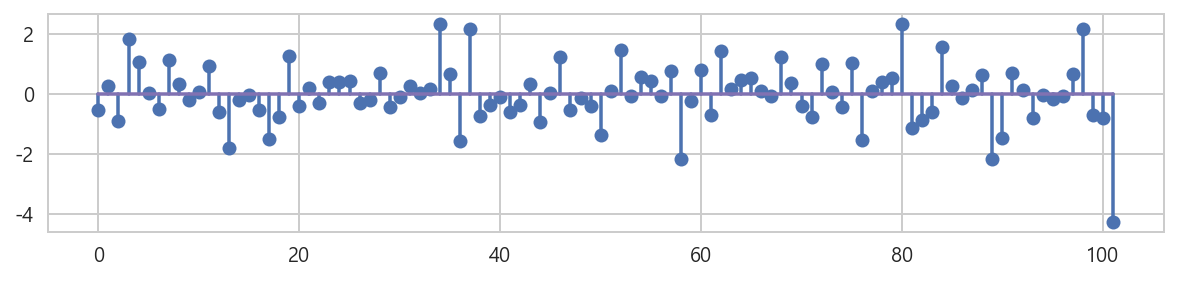

In [54]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.show()
# 보통 표준화 잔차가 2~4보다 크면 아웃라이어로 본다.

# 아웃라이어 cook's distance

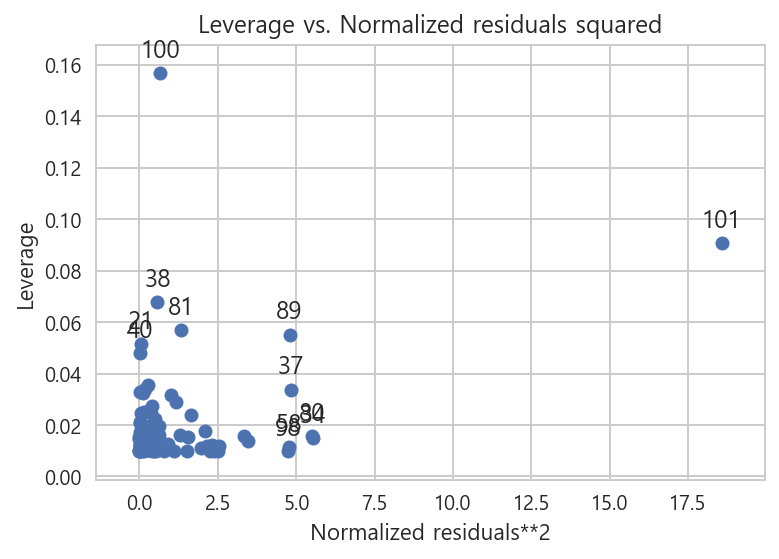

In [55]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

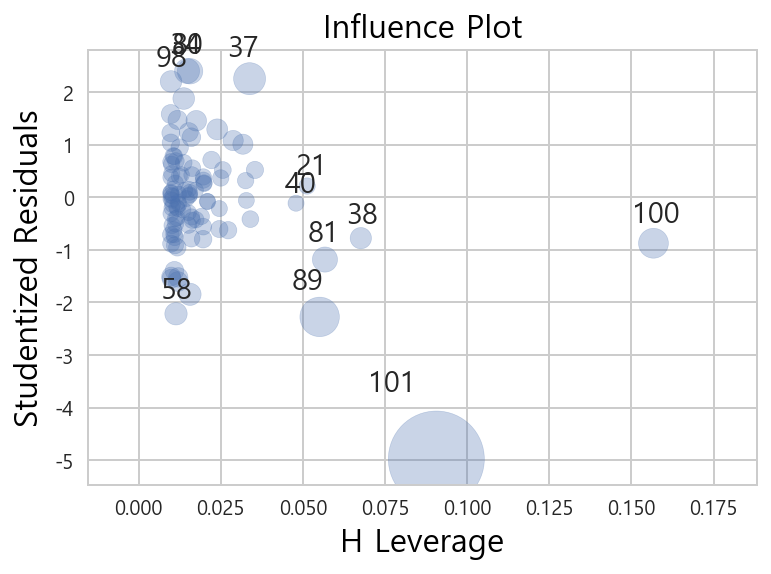

In [56]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

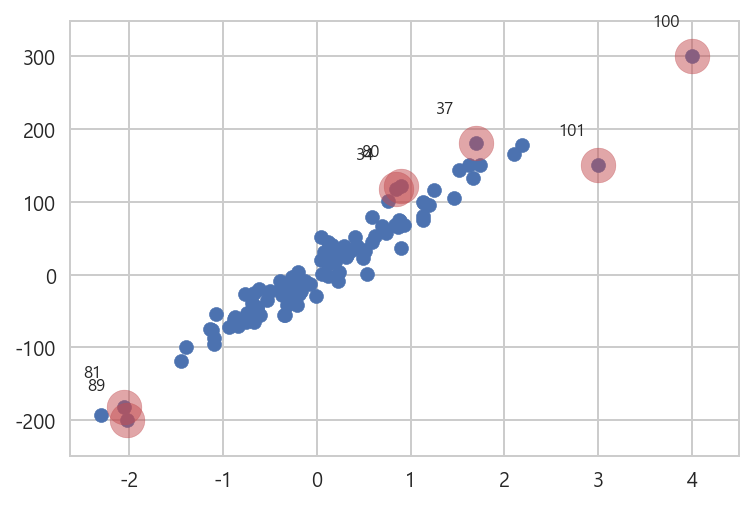

In [57]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, 
                    list(zip(X0[idx], y[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()